In [ ]:
try:
    import google.colab
    IN_COLAB = True

except ImportError:
    IN_COLAB = False

from pathlib import Path


if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    AUX_DATA_ROOT = Path("/content/drive/My Drive")

    import sys
    sys.path.insert(0, str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

In [ ]:
df_kaggle = pd.read_csv('winemag-data-130k-v2 (1).csv')

In [ ]:
df_kaggle

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103094,103094,Portugal,More commonly found in the Lisboa region much ...,Colheita Seleccionada,87.0,13.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Casa de Vilacetinho 2013 Colheita Seleccionada...,Arinto,Casa de Vilacetinho
103095,103095,Spain,"A grapy, clamped nose lacks nuance. In the mou...",Punto Suspensivo,87.0,21.0,Northern Spain,Calatayud,NaN,Michael Schachner,@wineschach,Castillo de Maluenda 2011 Punto Suspensivo Gar...,Garnacha,Castillo de Maluenda
103096,103096,France,"This full-bodied, ripe and generous wine is al...",NaN,87.0,32.0,Burgundy,Saint-Véran,NaN,Roger Voss,@vossroger,Château de Fuissé 2012 Saint-Véran,Chardonnay,Château de Fuissé
103097,103097,US,"Equally split between the two varieties, this ...",NaN,87.0,22.0,Oregon,Rogue Valley,Southern Oregon,Sean P. Sullivan,@wawinereport,Cliff Creek 2013 Marsanne-Roussanne (Rogue Val...,Marsanne-Roussanne,Cliff Creek


In [ ]:
sum(df_kaggle.description.isnull())
df_kaggle.description = df_kaggle.description.fillna("fine wine")

In [ ]:
df_kaggle.country = df_kaggle.country.fillna("other")


In [ ]:
sentences = df_kaggle.description.values

In [ ]:
labels = df_kaggle[['description', 'country']].groupby('country').count()>200

In [ ]:
df_kaggle[['description', 'country']].groupby('country').count()

,description
country,
Argentina,2977
Armenia,2
Australia,1863
Austria,2681
Bosnia and Herzegovina,2
Brazil,49
Bulgaria,103
Canada,184
Chile,3510


In [ ]:
labels

,description
country,
Argentina,True
Armenia,False
Australia,True
Austria,True
Bosnia and Herzegovina,False
Brazil,False
Bulgaria,False
Canada,False
Chile,True


array([[<Axes: title={'center': 'description'}>]], dtype=object)

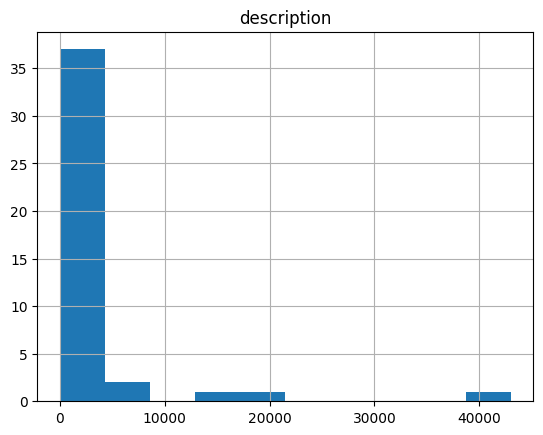

In [ ]:
df_kaggle[['description', 'country']].groupby('country').count().hist()

In [ ]:
labels.index

Index(['Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'Czech Republic', 'England', 'France', 'Georgia',
       'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy', 'Lebanon',
       'Luxembourg', 'Macedonia', 'Mexico', 'Moldova', 'Morocco',
       'New Zealand', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Switzerland', 'Turkey', 'US',
       'Ukraine', 'Uruguay', 'other'],
      dtype='object', name='country')

In [ ]:
labels.description.values

array([ True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,  True, False, False, False])

In [ ]:
labels_dict = dict(map(lambda i,j : (i,j) , labels.index,labels.description.values))

In [ ]:
labels_dict

{'Argentina': True,
 'Armenia': False,
 'Australia': True,
 'Austria': True,
 'Bosnia and Herzegovina': False,
 'Brazil': False,
 'Bulgaria': False,
 'Canada': False,
 'Chile': True,
 'Croatia': False,
 'Cyprus': False,
 'Czech Republic': False,
 'England': False,
 'France': True,
 'Georgia': False,
 'Germany': True,
 'Greece': True,
 'Hungary': False,
 'India': False,
 'Israel': True,
 'Italy': True,
 'Lebanon': False,
 'Luxembourg': False,
 'Macedonia': False,
 'Mexico': False,
 'Moldova': False,
 'Morocco': False,
 'New Zealand': True,
 'Peru': False,
 'Portugal': True,
 'Romania': False,
 'Serbia': False,
 'Slovakia': False,
 'Slovenia': False,
 'South Africa': True,
 'Spain': True,
 'Switzerland': False,
 'Turkey': False,
 'US': True,
 'Ukraine': False,
 'Uruguay': False,
 'other': False}

In [ ]:
df_kaggle['countries_cut'] = df_kaggle.country.apply(lambda x : x if labels_dict[x]==True else 'other')

In [ ]:
df_kaggle['countries_cut'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'other', 'Greece'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_kaggle.countries_cut.values)
labels = le.transform(df_kaggle.countries_cut.values)

In [ ]:
labels.shape

(103099,)

In [ ]:
labels

array([ 8, 10, 13, ...,  4, 13, 14])

In [ ]:
!pip install nltk

In [ ]:


import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

text = "Five fantastic fish flew off to find faraway functions. Maybe find another five fantastic fish? Find my fish with a function please!"

# remove punctuation
result = re.sub(r'[\.\?\!\,\:\;\"]', '', text).lower()

print(result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


five fantastic fish flew off to find faraway functions maybe find another five fantastic fish find my fish with a function please


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenized = word_tokenize(result)

print(tokenized)

['five', 'fantastic', 'fish', 'flew', 'off', 'to', 'find', 'faraway', 'functions', 'maybe', 'find', 'another', 'five', 'fantastic', 'fish', 'find', 'my', 'fish', 'with', 'a', 'function', 'please']


In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(token) for token in tokenized]

print(lemmatized)

['five', 'fantastic', 'fish', 'flew', 'off', 'to', 'find', 'faraway', 'function', 'maybe', 'find', 'another', 'five', 'fantastic', 'fish', 'find', 'my', 'fish', 'with', 'a', 'function', 'please']


In [ ]:
from nltk.corpus import stopwords

# define set of English stopwords
stop_words = set(stopwords.words('english'))
statement_no_stop = [word for word in lemmatized if word not in stop_words]

In [ ]:
statement_no_stop

['five',
 'fantastic',
 'fish',
 'flew',
 'find',
 'faraway',
 'function',
 'maybe',
 'find',
 'another',
 'five',
 'fantastic',
 'fish',
 'find',
 'fish',
 'function',
 'please']

In [ ]:
def simple_preprocessing(text):
  stop_words = set(stopwords.words('english'))
  result = re.sub(r'[\.\?\!\,\:\;\"]', '', text).lower()
  tokenized = word_tokenize(result)
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(token) for token in tokenized]
  statement_no_stop = [word for word in lemmatized if word not in stop_words]
  return statement_no_stop

In [ ]:
df_kaggle.description.apply( lambda x :simple_preprocessing(x) )

0         [aroma, include, tropical, fruit, broom, brims...
1         [ripe, fruity, wine, smooth, still, structured...
2         [tart, snappy, flavor, lime, flesh, rind, domi...
3         [pineapple, rind, lemon, pith, orange, blossom...
4         [much, like, regular, bottling, 2012, come, ac...
                                ...                        
103094    [commonly, found, lisboa, region, much, south,...
103095    [grapy, clamped, nose, lack, nuance, mouth, ra...
103096    [full-bodied, ripe, generous, wine, already, o...
103097    [equally, split, two, variety, conveys, light,...
103098                                         [fine, wine]
Name: description, Length: 103099, dtype: object

# CHECK IF DATASET IS BALANCED OR NOT

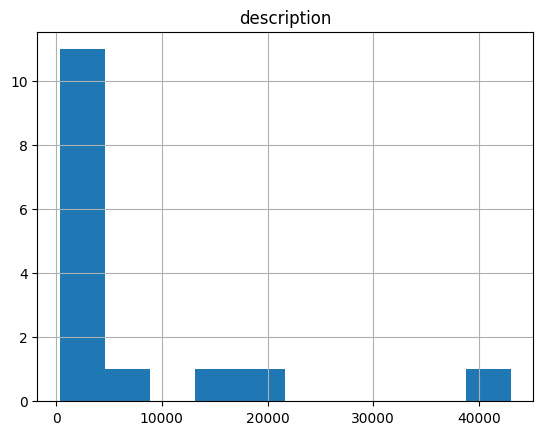

In [ ]:
df_kaggle[['description', 'countries_cut']].groupby('countries_cut').count().hist();


In [ ]:
labels

array([ 9, 11, 14, ...,  5,  5,  5])

# TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.build_tokenizer()(text)

['Five',
 'fantastic',
 'fish',
 'flew',
 'off',
 'to',
 'find',
 'faraway',
 'functions',
 'Maybe',
 'find',
 'another',
 'five',
 'fantastic',
 'fish',
 'Find',
 'my',
 'fish',
 'with',
 'function',
 'please']

In [ ]:
sentences[:3]

array(["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
       "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
       'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.'],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( sentences, labels, test_size=0.33, random_state=42)

In [ ]:
embeddings  = vectorizer.fit(X_train)
embeddings_train =vectorizer.transform(X_train)
embeddings_test =vectorizer.transform(X_test)

In [ ]:
embeddings_train.shape, embeddings_test.shape

((69076, 25111), (34023, 25111))

In [ ]:
embeddings_train

<69076x25111 sparse matrix of type '<class 'numpy.float64'>'
	with 2379423 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

TSVD = TruncatedSVD(n_components=100)
TSVD.fit(embeddings_train)

TruncatedSVD(n_components=100)

In [ ]:
cut_embeddings_train =TSVD.transform(embeddings_train)
cut_embeddings_test =TSVD.transform(embeddings_test)

In [ ]:
cut_embeddings_train.shape, cut_embeddings_test.shape

((69076, 100), (34023, 100))

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(cut_embeddings_train, y_train)
preds = clf.predict(cut_embeddings_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import balanced_accuracy_score,roc_auc_score
balanced_accuracy_score(y_test, preds)

0.5962914522224599

In [ ]:
roc_auc_score(y_test, clf.predict_proba(cut_embeddings_test), multi_class='ovr')

0.9468849267803923

In [ ]:
clf.predict(cut_embeddings_test)

array([13, 10,  5, ...,  0, 13,  8])

# SVM

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(class_weight = 'balanced')
svm_clf.fit(cut_embeddings_train, y_train)


LinearSVC(class_weight='balanced')

In [ ]:
from sklearn.metrics import balanced_accuracy_score,roc_auc_score

balanced_accuracy_score(y_test, svm_clf.predict(cut_embeddings_test))

0.5643155187995028

## SVM WITH NONLINEAR KERNELS

In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

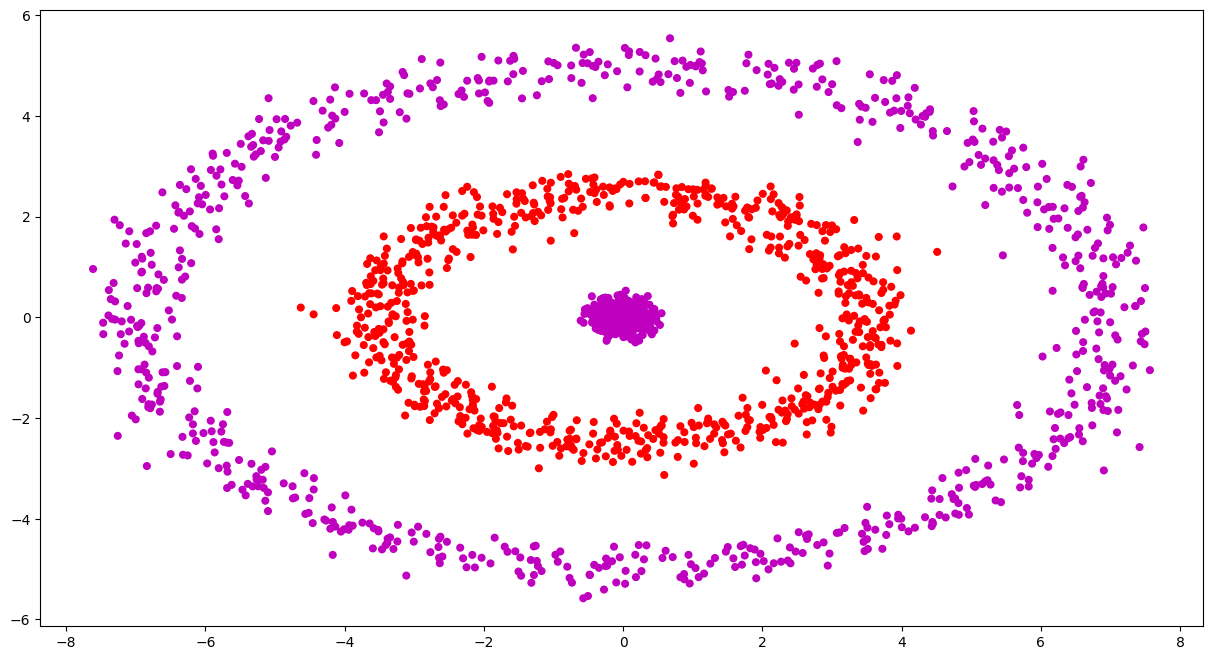

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
Xc, yc = noisy_circles
colors = np.array([x for x in 'mrm'])
colors = np.hstack([colors] * 20)
Xb, yb = datasets.make_blobs(n_samples=750, centers=1, n_features=2, center_box=(0.0, 0.0),
                 random_state=0)

yb += 2
Xb[:, 0] =Xb[:, 0]/6
Xb[:, 1] =Xb[:, 1]/5

Xc[:, 0] = Xc[:, 0]*5
Xc[:, 1] = Xc[:, 1]*7

X = np.concatenate((Xc, Xb),)
y = np.concatenate((yc, yb),)
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 1], X[:, 0], color=colors[y].tolist(), s=23)

y_ = [0 if el==2 else el for el in y  ]

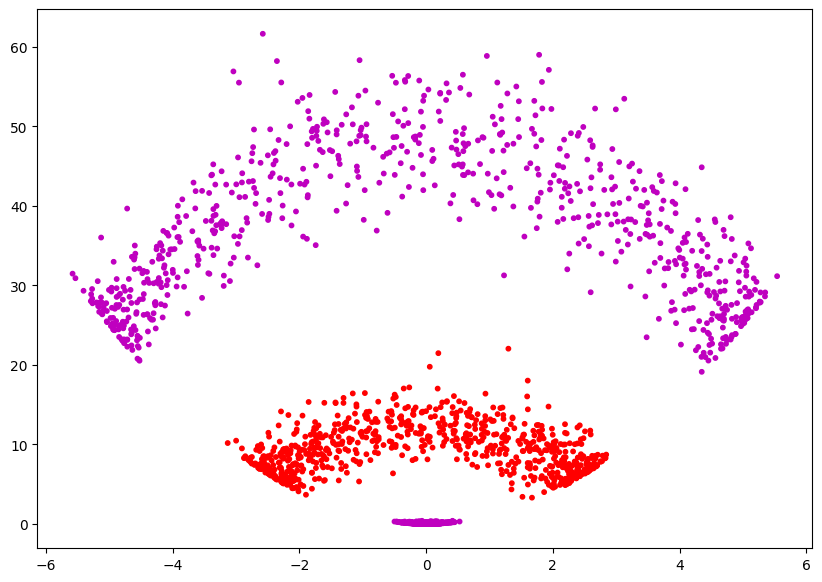

In [ ]:
Z =  (X[:, 0]**2 +X[:, 1]**2)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0 ], Z, color=colors[y].tolist(), s=10)

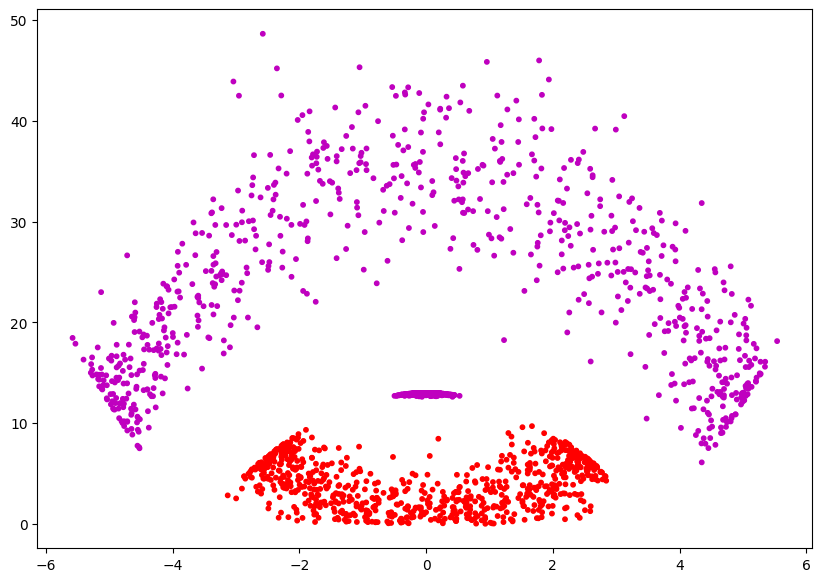

In [ ]:
Z =  np.sqrt((X[:, 0]**2 +X[:, 1]**2-13)**2)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0 ], Z, color=colors[y].tolist(), s=10)

In [ ]:
def phi(x):
   x_, y_ = x[:, 0], x[:, 1]

   return np.vstack([x_, y_ ,np.sqrt((x_**2 +y_**2-13)**2)]).T

In [ ]:
def kernel(x1, x2):
    return phi(x1) @ phi(x2).T

In [ ]:
model = svm.SVC(kernel=kernel)
_ = model.fit(np.array(X), np.array(y))

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy on Custom Kernel: {accuracy_score(y, model.predict(X))}')

Accuracy on Custom Kernel: 0.9408888888888889


In [ ]:
model = svm.SVC(kernel='rbf')
_ = model.fit(np.array(X), np.array(y))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, model.predict(X))

1.0

# BOOSTING

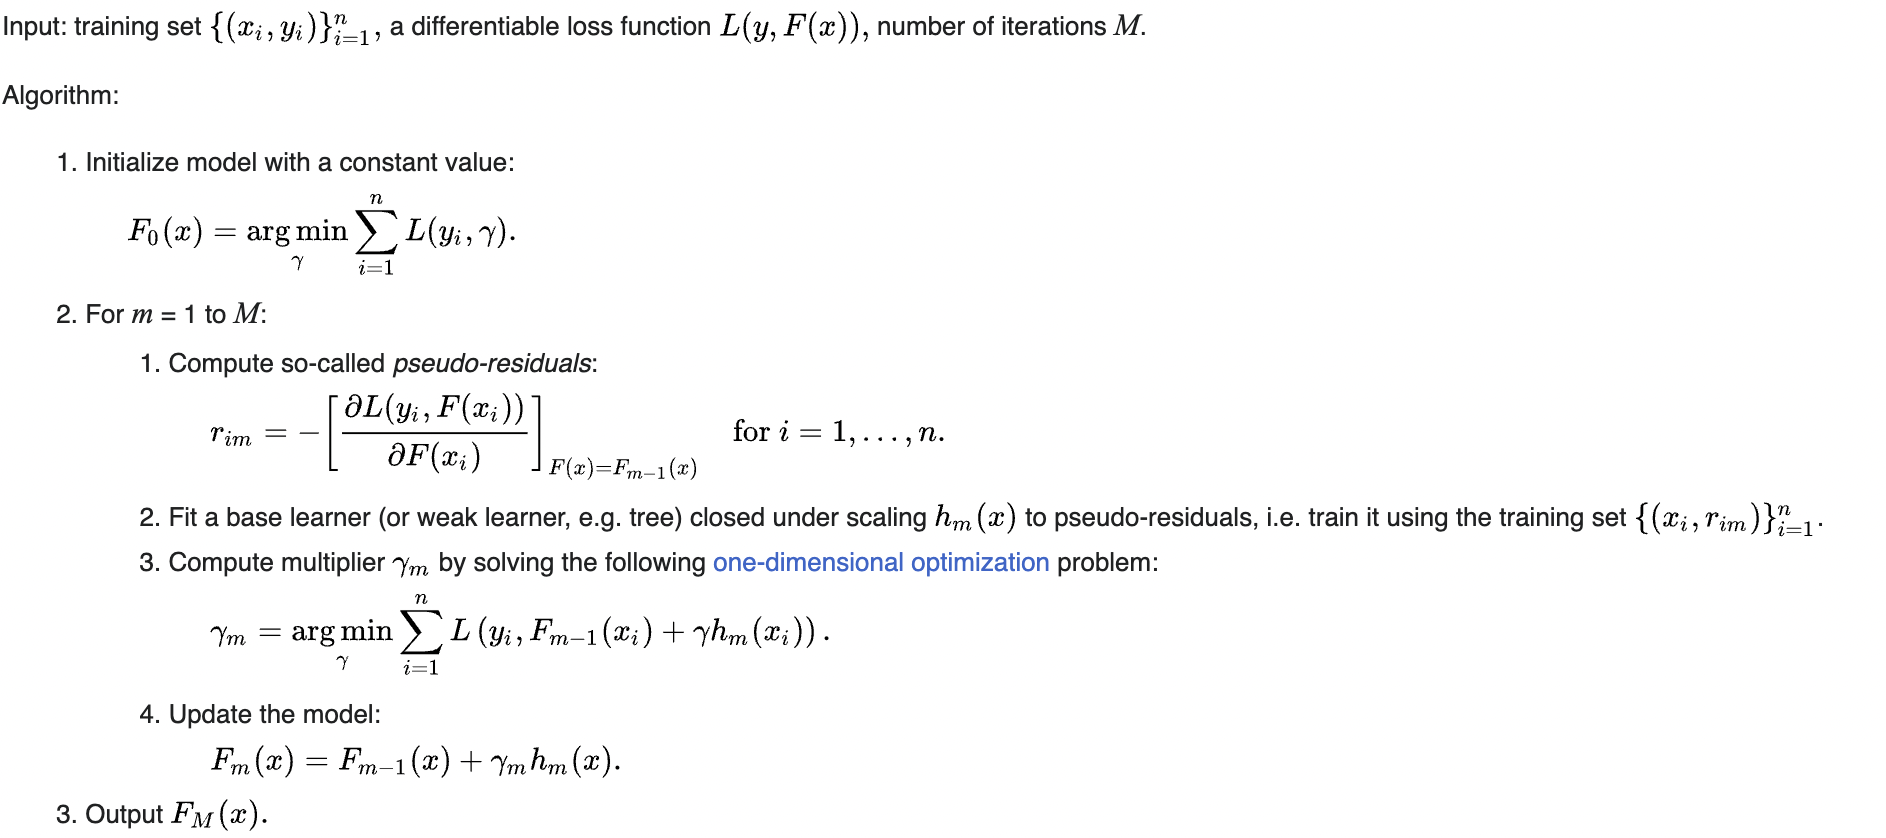

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(cut_embeddings_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
roc_auc_score(y_test, xgb.predict_proba(cut_embeddings_test), multi_class='ovo')

0.9374055084386365

In [ ]:

balanced_accuracy_score(y_test, xgb.predict(cut_embeddings_test))

0.43970534960226165

# HOW CAN WE COMPRESS THE DATA

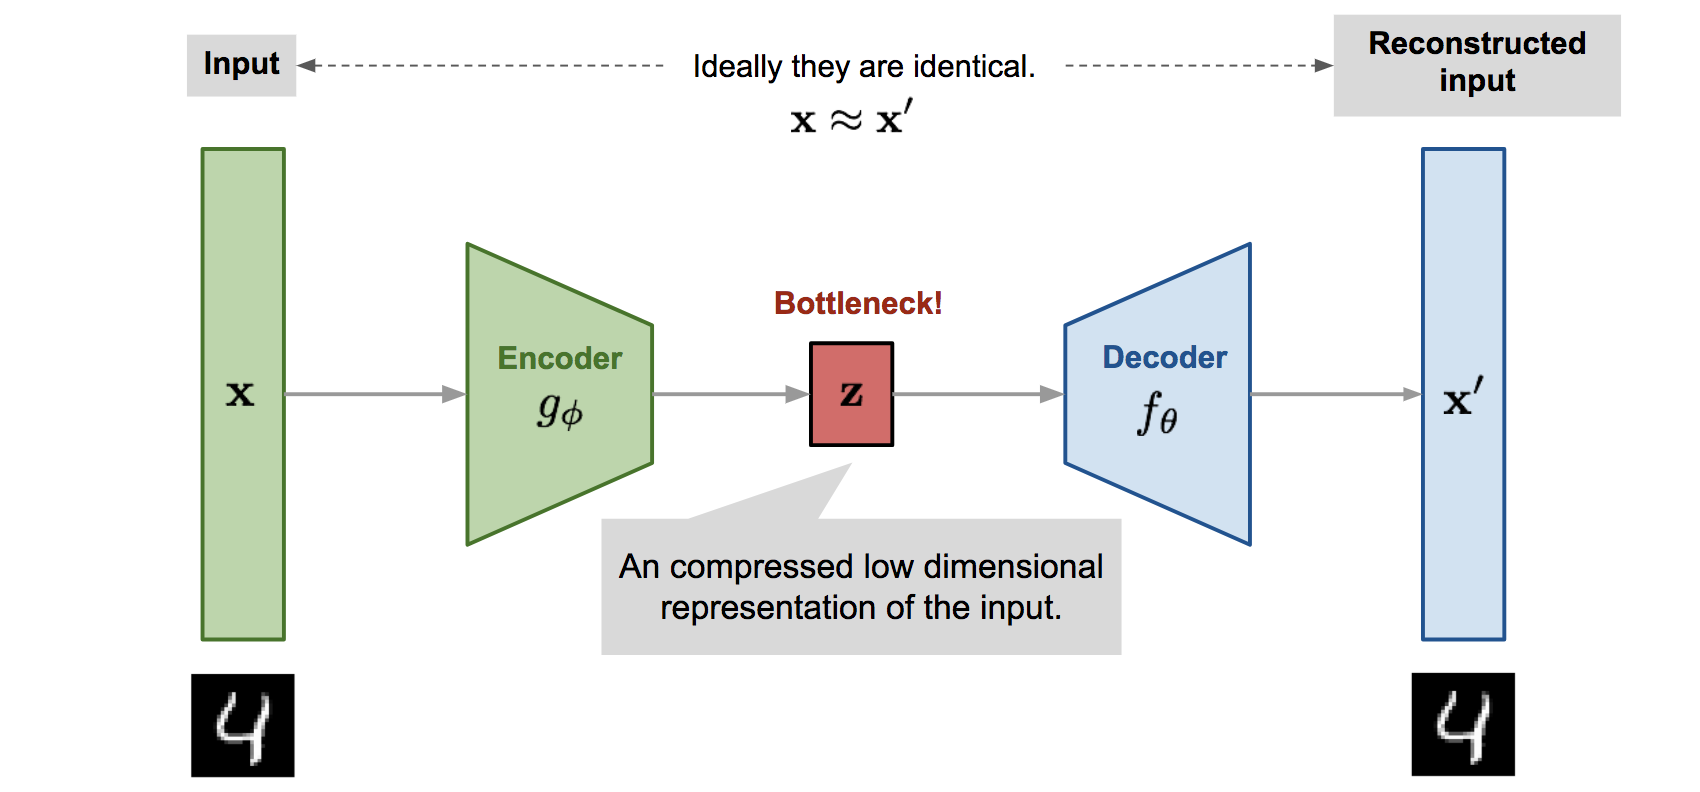

In [ ]:
embeddings_train.shape

(69076, 25111)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
nn.Linear(2,2).weight

Parameter containing:
tensor([[-0.3623, -0.4718],
        [-0.4305, -0.2783]], requires_grad=True)

In [ ]:
encoder = nn.Sequential(
          nn.Linear(25111, 256),
          nn.ReLU(),
          nn.Linear( 256, 256),
          nn.ReLU(),
          nn.Linear( 256, 512),
          nn.ReLU(),
          nn.Linear(512, 100),
          nn.Sigmoid())

decoder = nn.Sequential(

          nn.Linear(100, 512),
          nn.ReLU(),
          nn.Linear( 512, 256),
          nn.ReLU(),
          nn.Linear( 256, 256),
          nn.ReLU(),
          nn.Linear(256, 25111),
        )

In [ ]:
Autoencoder =  nn.Sequential(
            encoder,
          decoder
        ).to('cuda')

In [ ]:
Autoencoder

Sequential(
  (0): Sequential(
    (0): Linear(in_features=25111, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=100, bias=True)
    (7): Sigmoid()
  )
  (1): Sequential(
    (0): Linear(in_features=100, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=25111, bias=True)
  )
)

In [ ]:

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(Autoencoder.parameters())

In [ ]:
# pip install ipywidgets

In [ ]:
embeddings_train.shape

(69076, 25111)

In [ ]:
69076/49

1409.7142857142858

In [ ]:
batch_size = 2177

In [ ]:
for epoch in range(1):
    l= 0
    for i in range(40):
        batch = torch.Tensor(embeddings_train.toarray()[i*batch_size:(i+1)*batch_size, :]).to('cuda')
        optimizer.zero_grad()
        preds = Autoencoder(batch)
        loss = criterion(preds, batch)
        loss.backward()
        optimizer.step()
        print(loss.item())
        l+=loss.item()
    print(l/40)




0.0019778888672590256
0.0013091672444716096
0.0011398026254028082
0.00100619753357023
0.0008523441501893103
0.0006848132470622659
0.0005250992835499346
0.00040073166019283235
0.00031100245541892946
0.0002409670560155064
0.00018609975813888013
0.00014942727284505963
0.00012320370296947658
0.00010198201198363677
8.788080594968051e-05
8.087138121481985e-05
7.686839671805501e-05
7.292617374332622e-05
6.966292858123779e-05
6.741768447682261e-05
6.582918285857886e-05
6.40654398011975e-05
6.220229261089116e-05
6.038563878973946e-05
5.832853275933303e-05
5.60035441594664e-05
5.388957652030513e-05
5.203878754400648e-05
5.025223799748346e-05
4.845323564950377e-05
4.6914541599107906e-05
4.5739958295598626e-05
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: ignored

In [ ]:
cut_ae_train = Autoencoder[0].to('cpu')(torch.Tensor(embeddings_train.toarray()).to('cpu'))


NameError: ignored

In [ ]:
cut_ae_test = Autoencoder[0].to('cpu')(torch.Tensor(embeddings_test.toarray()).to('cpu'))

In [ ]:
cut_ae_train.shape

torch.Size([87080, 100])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(cut_ae_train.detach().numpy(), y_train)
preds = clf.predict(cut_ae_test.detach().numpy())

In [ ]:
balanced_accuracy_score(y_test, preds)

0.0625

In [ ]:
roc_auc_score(y_test, clf.predict_proba(cut_ae_test.detach().numpy()), multi_class='ovo')

0.6633952037391677

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6ea9ecd5e1fd7eed6c6c6da3244a9972ed8d578d15ca92e79d4b0ab172088b52
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
sbert_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
data = df_kaggle['description'].values
sentence_embeddings = sbert_model.encode(data)

In [ ]:
sentence_embeddings.shape

(25861, 768)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
preds = clf.predict(X_test)

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings,labels)

In [ ]:
balanced_accuracy_score(y_test, preds)

0.5655429573434845

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

0.924836682985223

# RECOMMENDER SYSTEM

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
query = 'I like black coffee, rainy evenings, chocolate, steaks, white vine'

In [ ]:
query_emb = sbert_model.encode(query)

In [ ]:
query_doc_cos_dist = [cosine(query_emb, wine) for wine in sentence_embeddings]

In [ ]:
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))

print_count = 0
for rank, sort_index in enumerate(query_doc_sort_index):
    print ('Rank : ', rank, ' Consine : ', 1 - query_doc_cos_dist[sort_index],' wine review : ', data[sort_index])
    if print_count == 10 :
        break
    else:
        print_count += 1

Rank :  0  Consine :  0.8140923380851746  wine review :  A bit light in body, but rich in raspberries, cherries, pomegranates, cola and spicy vanilla, with a smoky coating of oak. Excellent Central Coast acidity perks things up. Drink now with a nice steak.
Rank :  1  Consine :  0.8047780990600586  wine review :  Aromas suggest underbrush, coffee and a hint of meat juices. The palate delivers dense black raspberry accented with grilled herbs, vanilla and light toasted notes alongside the heat of evident alcohol. It's monolithic and ready so drink soon.
Rank :  2  Consine :  0.8043243288993835  wine review :  Freshly acidic and jammy in blackberry, cherry and raspberry flavors, this is one of the fruitier Napa Cabs available. It's at its best now, so drink up with a nice steak.
Rank :  3  Consine :  0.7995924353599548  wine review :  There's a hard, metallic flavor and feeling. Under that are good black cherry and cola flavors, touched with sweet, smoky oak. It's okay with basic burgers

# K MEANS 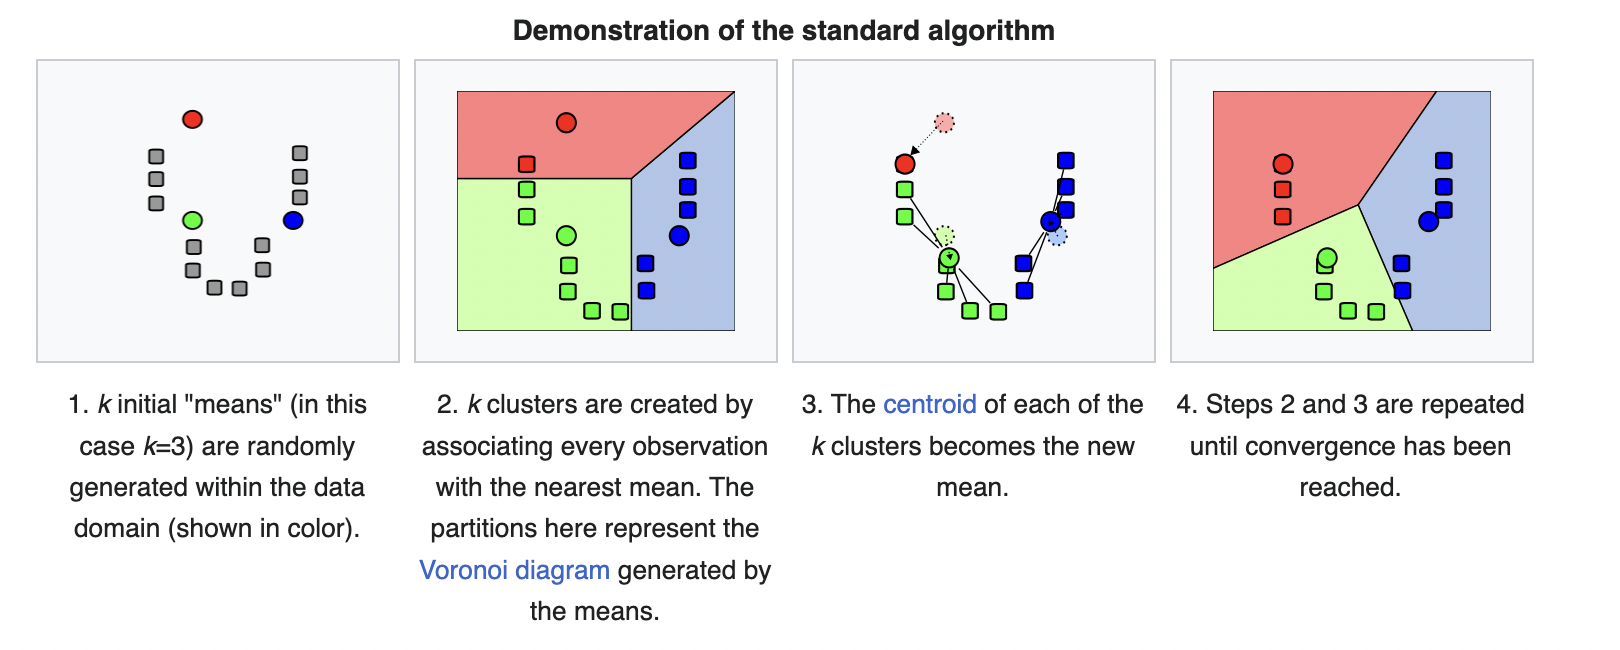

In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
len(labels)


25861

In [ ]:
indxs = np.random.choice(len(labels), 10000, replace=False)
snt_emb_cut = sentence_embeddings[indxs, :]
countries_labels = df_kaggle.countries_cut.values[indxs]
titles= df_kaggle.title.values[indxs]

In [ ]:
kmeans = KMeans(n_clusters=len(set(labels)), random_state=0, n_init="auto").fit(snt_emb_cut)
clusters  = kmeans.labels_


In [ ]:
perplexity = 50
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(snt_emb_cut))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(snt_emb_cut))



In [ ]:
#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(snt_emb_cut))


In [ ]:
TCs_1d.columns = ["TC1_1d"]

TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]
plotX = pd.concat([pd.DataFrame(snt_emb_cut),TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')
plotX1 = pd.concat([pd.DataFrame(snt_emb_cut),TCs_1d,TCs_2d,TCs_3d], axis=1)
plotX1['title'] = countries_labels

In [ ]:
clusters_ = []
for i in range(10):
  clusters_.append(plotX1[clusters == i])

In [ ]:
traces = [go.Scatter3d(
                    x = clusters_[i]["TC1_3d"],
                    y = clusters_[i]["TC2_3d"],
                    z = clusters_[i]["TC3_3d"],
                    mode = "markers",
                    hoverinfo = 'text',
                    name = "Cluster " + str(i) ,
                    text = clusters_[i]["title"]) for i in range(10)]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

In [ ]:
sum(countries_labels ==clusters)/len(countries_labels)

0.0